#### Define Meta-Parameters
##### Meta-Parameters

In [23]:
N_Reconfigurations = 10**2
d = 1 # Dimension of X
D = 1 # Dimension of Y

# Data Meta-Parameters
noise_level = 0.1
uncertainty_level= 0.9

# Training meta-parameters
Epochs = 3

##### Simulation Meta-Parameters

In [24]:
# Number of Datapoints
N_data = 10**2
# Unknown Function
def unknown_f(x):
    return np.sin(np.sin(x))

#### Generate Data

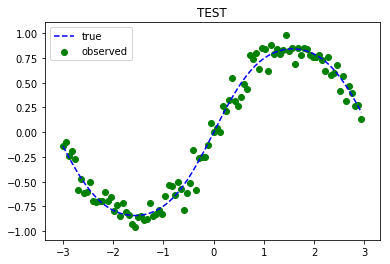

In [25]:
%run Data_Generator.ipynb # Exectute temporary training Parameters

#### Define NEU-OLS

In [26]:
%run NEU_Backend.ipynb

TensorFlow: 2.1.0


ValueError: Unknown initializer: GlorotUniform

### Compile NEU_OLS

In [21]:
NEU_OLS.compile(loss='mse',
                optimizer="SGD",
                metrics=['mae', 'mse'])

### Fit NEU OLS

In [22]:
history = NEU_OLS.fit(
  data_NEU, data_y,
  epochs=Epochs)

KeyboardInterrupt: 

In [ ]:
NEU_prediction = NEU_OLS.predict(data_NEU)

### Evaluate Benchmark Regression Models

In [ ]:
%run Regression_Benchmark_Models.ipynb

In [ ]:
# import matplotlib.pyplot as plt
# Adjust Figure Details
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Plot Models
plt.plot(data_x,true_y,color='k',label='true',linestyle='--')
plt.plot(data_x,f_hat_smoothing_splines,color='y',label='Splines')
plt.plot(data_x,f_hat_lowess,color='m',label='Lowess')
plt.plot(data_x,model_pred_y,color='r',label='OLS')
plt.plot(data_x,NEU_prediction,color='b',label='NEU-OLS')

# Add Legends
plt.scatter(data_x,data_y,color='g',label='observed')
plt.legend(loc="upper left")
plt.title("TEST")
plt.show()